# STOR 320 Homework 5: Visualization and Linear Regression

Please submit the solution to gradescope by 11:59 PM, Nov 7, Thursday.

**Name**: Ivy Nangalia

**PID**: 730670491


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem 1. (5 points). 

A random walk is a mathematical concept that describes a path consisting of a series of random steps. A random walk progresses in discrete steps. In each step, the position either increases or decreases by a certain amount, typically +1 or -1.

- 1.1 Generate 10 random walks, each starting at 0 and having 100 steps. Each step should be randomly either -1 or +1. Store each random walk as a separate line in a 2D array or list. Set random seed as `42`. (3 points)
- 1.2 Visualize the 10 random walks in a single plot. Each random walk should have its own color and be labeled as Walk 1, Walk 2, ..., Walk 10. (2 points)

In [7]:
#1.1
np.random.seed(42)

walks = np.cumsum(np.random.choice([-1, 1], size=(10, 100)), axis=1)
walks[0]

array([-1,  0, -1, -2, -3, -2, -3, -4, -5, -4, -5, -6, -7, -8, -7, -8, -7,
       -6, -5, -6, -5, -6, -5, -4, -3, -2, -1,  0,  1,  2,  1,  0,  1,  2,
        3,  2,  3,  2,  1,  0, -1, -2, -1,  0,  1,  2,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  5,  4,  3,  2,  1,  0, -1, -2, -3, -2, -1, -2,
       -1,  0,  1,  2,  1,  2,  1,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,
        2,  3,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 12])

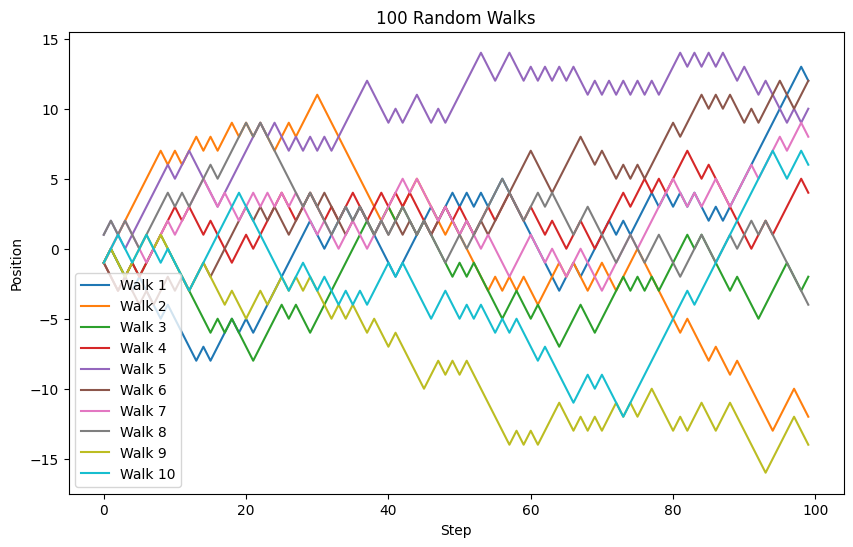

In [8]:
plt.figure(figsize=(10, 6))
for i in range(num_walks):
    plt.plot(walks[i], label=f'Walk {i+1}')

plt.xlabel('Step')
plt.ylabel('Position')
plt.title('100 Random Walks')
plt.legend()
plt.show()

## Problem 2. Recreate the  ``pd.get_dummies()`` function from stratch. (20 points). 

- 2.1 Write a function called `convert_to_binary` **from scratch** that takes a pandas DataFrame of categorical features and returns a DataFrame where each feature is converted into multiple binary columns.  (8 points)

* Each binary column should represent a feature-category combination.
* The column names should follow the format feature_category. For example, if the feature `Color` has values `E`, `I`, and `J`, the new columns should be `Color_E`, `Color_I`, and `Color_J`.

- 2.2 Apply the `convert_to_binary` to the `Color` and `Cut` columns in `diamonds-new.csv`. Print the converted dataframe. (4 points)

- 2.3 Apply the `pd.get_dummies()` function to the same dataset, and check if the output of `convert_to_binary` is the same as `pd.get_dummies()`. (8 points)

**Hint:** Use `np.allclose` to check if the outputs are the same.


In [ ]:
def convert_to_binary(df: pd.DataFrame) -> pd.DataFrame:
    cols = df.columns
    for col in cols:

# Problem 3: Simple linear regression with `penguins` dataset (15 points)

The dataset `penguins`contains measurements for different penguin species. The dataset includes the following relevant columns:

- bill_length_mm: Length of the penguin's bill in millimeters.

- bill_depth_mm: Depth of the penguin's bill in millimeters.

- species: Species of the penguin (e.g., Adelie, Gentoo, Chinstrap).

* **3.1** Create a scatter plot with a linear regression line for the entire dataset. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (3 points)

* **3.2** Based on your plot, describe the relationship between bill length and bill depth. What is the meaning of the slope of the line in the plot? (3 points)

* **3.3** Create a similar scatter plot with a linear regression line grouping by species. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (4 points)

* **3.4** Based on your plot, describe the relationship between bill length and bill depth. Describe the differences of plots between 3.1 and 3.3 (5 points)

In [7]:
penguins = sns.load_dataset("penguins")

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [3]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='bill_depth_mm ~ bill_length_mm',
                 data=penguins).fit()
print(mod.summary())

NameError: name 'penguins' is not defined

# Problem 4: Linear regression with `diamonds-new.csv`. (60 points)

* 4.1 Read the `diamonds-new.csv`, check if there is any missing value. How many missing values are there? (3 points)
* 4.2 Remove the rows with missing values. Check if there is any missing value in the new table. (2 points)
* 4.3 Create a histgram of the price distribution. What do you observe?  (5 points)
* 4.4 Create a scatter plot between `Price` and `Carat`, grouping by the level of `Cut`. What difference do you observe for different `Cut` levels? Do you observe a linear trend? (5 points)

* 4.5 Create a scatter plot between `Price` and `depth`, grouping by the level of `Cut`. Do you observe a linear trend? (5 points)

* 4.6 Create a barplot between `Price` and `Color`, grouping by the level of `Cut`. Which type of `Color` and `Cut` combination has the largest average price? (5 points)

* 4.7 Use `train_test_split` to split the whole dataset into training set and testing set, according to the ratio 80% and 20%. How many rows in the training set? How many rows in the test set? (5 points)

* 4.8 Build a linear regression model to predict the prices based on all other columns. What is the value of in-sample R-squared?  (5 points)

* 4.9 Calculate the VIF values for each column within `['Carat', 'depth', 'table', 'x', 'y', 'z']`. Is there any multicollinearity within these columns? (5 points)

* 4.10 Remove proper columns within `['Carat', 'depth', 'table', 'x', 'y', 'z']` based on the values of VIF. (5 points)

* 4.11 Build a new linear regression model using the selected columns in 4.10. What is the value of in-sample R-squared? Write down the math formulation for predicting the price of a diamonds based on the coefficient in this model. (5 points)

* 4.12 Calculate the out-of-sample R-squared for the model in 4.11. (5 points)

* 4.13 Visualize the prediction error as a function of the predicted prices. Add a horizontal line representing residual = 0. What do you observe? (5 points)



In [10]:
diamonds = pd.read_csv("diamonds-new.csv")
